In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test['SalePrice']=train['SalePrice'].mean()
test.index=test.index+len(train)

In [51]:
df0=pd.concat([train,test])

In [52]:
df0.shape,train.shape,test.shape

((2919, 81), (1460, 81), (1459, 81))

In [53]:
df0.iloc[:len(train)]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal   208500.0  
1         5   2007        WD         Normal   181500.0  
2         9   2008        WD         Normal   223500.0  
3         2   2006        WD        Abnorml   140000.0  
4        12   2008        WD         Normal   250000.0  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal   175000.0  
1456      2   2010        WD         Normal   210000.0  
1457      5   2010        WD         Normal   266500.0  
1458      4   2010        WD         Normal   142125.0  
1459      6   2008        WD         Normal   147500.0  

[1460 rows x 81 columns]

Kita mau prediksi `SalePrice`, maka marilah kita lakukan analisis hubungan kolum-kolum lain dengannya

Mari kita lihat deskripsi data (dapat dilihat di situs kaggle atau file `data_description.txt`)

___

Berikut penemuan yang didapatkan setelah membaca deskripsi data:

**Berikut 4 skala data (data scale)**

Nominal: diskrit & tidak berurut (laki dan perempuan, warna-warna, lokasi-lokasi/kordinat)

Ordinal: diskrit & berurut (kanker stage 1, 2, dll.)

Interval: kontinuu & tidak bisa ditambah dan dibagi (2 Januari 1999, tanggal-tanggal, biasanya berhubungan dengan waktu)

Ratio ("rasio"?): kontinuu & bisa ditambah (100 volt, 100.5 kg, 0 detik)

> ingat, detik menit jam (ratio) berbeda dengan tanggal (interval)

> ada juga data boolean, yaitu yang nilainya ada 2 kemungkinan. kyknya data ini bisa dimasukkan ke nominal atau ordinal, kurang tau yang "lebih benar" yang mana. Namun pada akhirnya akan dirubah menjadi 1 dan 0 atau 0 dan 1 (biasanya algoritmanya tidak akan mementingkan urutannya kalau hanya 2 kemungkinan)

Kita akan pisah kolum berdasarkan skala data

Kolum nominal:
`MSSubClass`, `MSZoning`, `Street`, `LandContour`, 
`LotConfig`, `Neighborhood`, `Condition1`, `Condition2`,
`BldgType`, `HouseStyle`, `RoofStyle`, `RoofMatl`, `Exterior1st`, 
`Exterior2nd`, `MasVnrType`, `Foundation`, `Heating`, `Electrical`, `GarageType`, 
`MoSold`, `YrSold`, 
`SaleType`, `SaleCondition`,`CentralAir`

Kolum ordinal:
`Alley`, `LotShape`, `Utilities`, `LandSlope`, `OverallQual`, 
`OverallCond`, `ExterQual`, `ExterCond`, `BsmtQual`, `BsmtCond`, `BsmtExposure`,
`BsmtFinType1`,  `BsmtFinType2`,  `HeatingQC`,  `KitchenQual`,  
`Functional`,  `FireplaceQu`,  `GarageFinish`,  `GarageQual`,  `GarageCond`,  `PavedDrive`, 
`PoolQC`, `Fence`, `MiscFeature`

Kolum interval:
`YearBuilt`, `YearRemodAdd`, `GarageYrBlt`

Kolum ratio:
`LotFrontage`, `LotArea`, `MasVnrArea`, `BsmtFinSF1`, `BsmtFinSF2`, 
`BsmtUnfSF`, `TotalBsmtSF`, `1stFlrSF`, `2ndFlrSF`, `LowQualFinSF`, `GrLivArea`, 
`BsmtFullBath`, `BsmtHalfBath`, `FullBath`, `HalfBath`, `BedroomAbvGr`, `KitchenAbvGr`, 
`TotRmsAbvGrd`, `Fireplaces`, `GarageCars`, `GarageArea`, `WoodDeckSF`, `OpenPorchSF`, 
`EnclosedPorch`, `3SsnPorch`, `ScreenPorch`, `PoolArea`,
`MiscVal`, `SalePrice`

___

In [55]:
K_NOMINAL={"MSSubClass", "MSZoning", "Street", "LandContour", 
"LotConfig", "Neighborhood", "Condition1", "Condition2",
"BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", 
"Exterior2nd", "MasVnrType", "Foundation", "Heating", "Electrical", "GarageType", 
"MoSold", "YrSold", 
"SaleType", "SaleCondition","CentralAir"}

K_ORDINAL={"Alley", "LotShape", "Utilities", "LandSlope", "OverallQual", 
"OverallCond", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure",
"BsmtFinType1",  "BsmtFinType2",  "HeatingQC",  "KitchenQual",  
"Functional",  "FireplaceQu",  "GarageFinish",  "GarageQual",  "GarageCond",  "PavedDrive", 
"PoolQC", "Fence", "MiscFeature"}

K_INTERVAL={"YearBuilt", "YearRemodAdd", "GarageYrBlt"}

K_RATIO={"LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", 
"BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", 
"BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", 
"TotRmsAbvGrd", "Fireplaces", "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", 
"EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea",
"MiscVal","SalePrice"}

K_DISKRIT=K_NOMINAL.union(K_ORDINAL)

K_KONTINUU=K_INTERVAL.union(K_RATIO)


Pertama, kita akan melakukan [_clipping_](https://images.squarespace-cdn.com/content/v1/53721e2ce4b05f3bc92f64e3/826755fd-770f-41ae-9c5d-fed3d8eaef5a/r18b+clipping+sine+wave.png?format=1000w),
yaitu membatasi nilai. Kita akan membatasi nomor dengan persentil ke-5 dan ke-95
Tujuan utama dari langkah ini adalah untuk menghilangkan [_outlier_](https://www.elegantjbi.com/blog/wp-content/uploads/2018/10/what-is-outlier-analysis.jpg) 
dari data


In [56]:
df1=df0.copy()
cols=list(K_KONTINUU)#intersection = irisan
p05=df0[cols].quantile(0.05)
p95=df0[cols].quantile(0.95)
df1[cols]=df0[cols].clip(p05,p95,axis=1) #inplace=True sehingga data dirubah langsung


Selanjutnya, kita akan melakukan [_normalization_ dan _data scaling_](https://www.kaggle.com/code/alexisbcook/scaling-and-normalization) 

In [57]:
skewness=df1[list(K_RATIO)].skew()
skewness

BsmtFinSF2       2.996332
ScreenPorch      3.042480
OpenPorchSF      1.215510
BsmtFinSF1       0.552155
KitchenAbvGr     0.000000
WoodDeckSF       0.846812
HalfBath         0.531240
Fireplaces       0.588651
BedroomAbvGr     0.148315
2ndFlrSF         0.667178
EnclosedPorch    2.371243
PoolArea         0.000000
LotArea          0.257184
TotalBsmtSF      0.392386
BsmtFullBath     0.343129
GarageArea      -0.151513
FullBath        -0.190749
LotFrontage      0.095481
3SsnPorch        0.000000
MiscVal          0.000000
LowQualFinSF     0.000000
GarageCars      -0.354976
1stFlrSF         0.500349
TotRmsAbvGrd     0.239589
GrLivArea        0.548978
BsmtHalfBath     3.707631
MasVnrArea       1.437783
BsmtUnfSF        0.681746
SalePrice        0.592709
dtype: float64

Diatas adalah _skew_ yang menggambarkan berapa miring distribusi suatu kolom data.

Kita akan menormalisasi data yang _skew_-nya > 0.9 (yang dapat didapatkan dengan
`skewness[skewness>0.9]skewness[skewness>0.9]`) dengan `power_transform` 
dan sisanya dengan `RobustScaler`
___

Berikut ilustrasi _skew_

Text(0.5, 1.0, 'skew=0.5489780139542215')

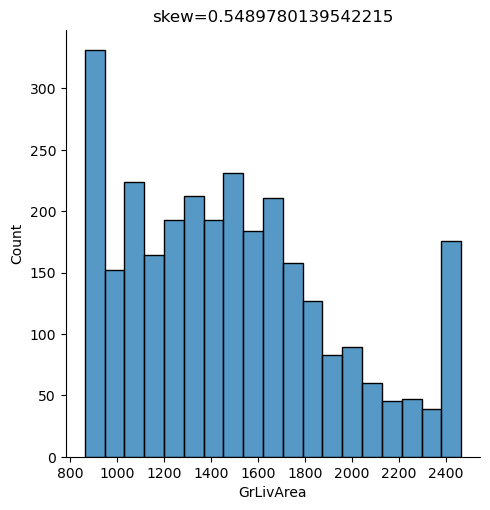

In [58]:
sns.displot(x=df1['GrLivArea'])
plt.title(f"skew={skewness['GrLivArea']}")

Text(0.5, 1.0, 'skew=3.0424800245176553')

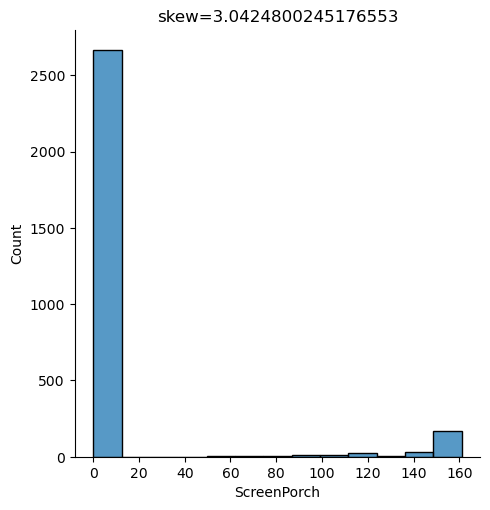

In [59]:
sns.displot(x=df1['ScreenPorch'])
plt.title(f"skew={skewness['ScreenPorch']}")

Text(0.5, 1.0, 'skew=-0.19074942387508462')

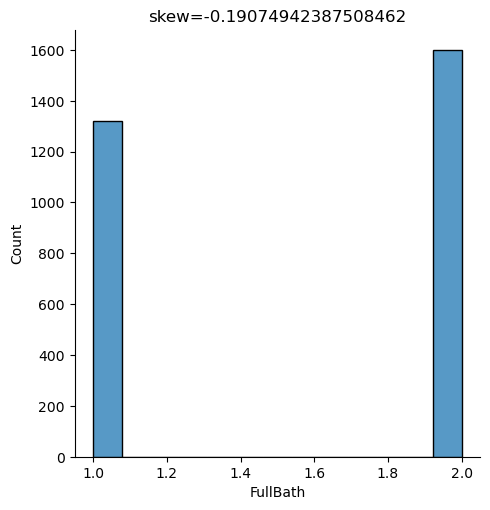

In [60]:
sns.displot(x=df1['FullBath'])
plt.title(f"skew={skewness['FullBath']}")

Untuk normalisasi, kita gunakan `power_transform` tanpa alasan kuat [(metode lain ada)](https://www.geeksforgeeks.org/data-normalization-in-data-mining/)

In [61]:
from sklearn.preprocessing import PowerTransformer

In [62]:
transformer=PowerTransformer()

In [63]:
df2=df1.copy()
df2[skewness[skewness>0.9].index]=transformer.fit_transform(df1[skewness[skewness>0.9].index])

Untuk sisa datanya, kita akan gunakan `RobustScaler` untuk _data scaling_

In [64]:
from sklearn.preprocessing import RobustScaler

In [65]:
scaler=RobustScaler()

In [66]:
scaled=scaler.fit_transform(df2[list(K_KONTINUU)])

In [67]:
df3=df2.copy()
df3[list(K_KONTINUU)]=pd.DataFrame(scaled,columns=scaler.get_feature_names_out())

Sekarang, kita akan mengurusi data yang hilang. Mari kita cek tingkat data `NaN` per kolum

In [68]:
df3.isna().mean()[df3.isna().mean()>0]

MSZoning        0.001370
LotFrontage     0.166495
Alley           0.932169
Utilities       0.000685
Exterior1st     0.000343
Exterior2nd     0.000343
MasVnrType      0.008222
MasVnrArea      0.007879
BsmtQual        0.027749
BsmtCond        0.028092
BsmtExposure    0.028092
BsmtFinType1    0.027064
BsmtFinSF1      0.000343
BsmtFinType2    0.027407
BsmtFinSF2      0.000343
BsmtUnfSF       0.000343
TotalBsmtSF     0.000343
Electrical      0.000343
BsmtFullBath    0.000685
BsmtHalfBath    0.000685
KitchenQual     0.000343
Functional      0.000685
FireplaceQu     0.486468
GarageType      0.053786
GarageYrBlt     0.054471
GarageFinish    0.054471
GarageCars      0.000343
GarageArea      0.000343
GarageQual      0.054471
GarageCond      0.054471
PoolQC          0.996574
Fence           0.804385
MiscFeature     0.964029
SaleType        0.000343
dtype: float64

Ada beberapa cara mengatasi data hilang:

- Jika terlalu banyak kehilangan, delete kolum
- Jika sedikit kehilangan, delete baris atau isi baris dengan mean, median, modus, atau [metode lain](https://www.phind.com/search?cache=1167f358-803a-4557-9a44-685850529ad3)

___

Untuk data dengan tingkat kehilangan >0.4, akan kita drop kolum.
Untuk sisanya, akan kita tukar nilai hilang dengan mean, median, dan modus jika data tersebut kontinuu. Jika tidak konotinuu, kita delete baris

In [69]:
drop_cols=df3.isna().mean()[df3.isna().mean()>0.4]
drop_cols

Alley          0.932169
FireplaceQu    0.486468
PoolQC         0.996574
Fence          0.804385
MiscFeature    0.964029
dtype: float64

In [70]:
df4=df3.drop(columns=drop_cols.index)

In [71]:
remaining=df4.isna().mean()[df4.isna().mean()>0]
remaining

MSZoning        0.001370
LotFrontage     0.166495
Utilities       0.000685
Exterior1st     0.000343
Exterior2nd     0.000343
MasVnrType      0.008222
MasVnrArea      0.007879
BsmtQual        0.027749
BsmtCond        0.028092
BsmtExposure    0.028092
BsmtFinType1    0.027064
BsmtFinSF1      0.000343
BsmtFinType2    0.027407
BsmtFinSF2      0.000343
BsmtUnfSF       0.000343
TotalBsmtSF     0.000343
Electrical      0.000343
BsmtFullBath    0.000685
BsmtHalfBath    0.000685
KitchenQual     0.000343
Functional      0.000685
GarageType      0.053786
GarageYrBlt     0.054471
GarageFinish    0.054471
GarageCars      0.000343
GarageArea      0.000343
GarageQual      0.054471
GarageCond      0.054471
SaleType        0.000343
dtype: float64

diatas informasi rata-rata data hilang: 16.6% dari baris pada kolum `LotFrontage` kosong, dst.

`remaining` adalah kolum-kolum yang memiliki baris kosong/data hilang

Kita akan lakukan imputasi yaitu mengisi data yang kosong dengan mean, median, modus atau lainnya

Kita isi data kosong dengan modus, jika diskrit.

Kita isi data kosong dengan mean, jika kontinuu.

___

Sebelum lakukan imputasi pada data diskrit, kita harus merubah data teks menjadi data numerik dengan `LabelEncoder`

In [72]:
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder

In [73]:
class MultiColumnLabelEncoder:
    def __init__(self,columns):
        self.columns = columns # list
        self.encoders = [LabelEncoder() for _ in self.columns]

    def fit(self,X):
        output = X.copy()
        for enc, col in zip(self.encoders, self.columns):
            output[col] = enc.fit(output[col])
            if len(list(set(enc.classes_)&{np.nan}))==0:
                enc.classes_ = np.append(enc.classes_,np.nan)
        return self

    def transform(self,X):
        output = X.copy()
        for enc, col in zip(self.encoders, self.columns):
            err=True
            while err:
                try:
                    output[col] = enc.transform(output[col])
                    err=False
                except:
                    enc.classes_=np.append(
                        enc.classes_,
                        *(set(output[col].unique())-set(enc.classes_))
                    )
        return output
    
    def inverse_transform(self, X):# X: np.array[n_sample, n_classes]
        ret = []
        for enc,x in zip(self.encoders,X.T):
            ret.append(enc.inverse_transform(x.astype(int)))
        return np.array(ret).T
    
    def fit_transform(self,X):
        return self.fit(X).transform(X)
    
    

In [76]:
diskrit_imputer = SimpleImputer(fill_value='mode',add_indicator=True)
kontinuu_imputer = SimpleImputer(fill_value='mean')
label_encoder = MultiColumnLabelEncoder(columns=list(K_DISKRIT.intersection(df4.columns)))

In [77]:
label_encoded = label_encoder.fit_transform(df4[list(K_DISKRIT.intersection(df4.columns))])
hasil_imputasi_diskrit_=diskrit_imputer.fit_transform(label_encoded)
hasil_imputasi_diskrit=label_encoder.inverse_transform(hasil_imputasi_diskrit_)
hasil_imputasi_diskrit

array([['Reg', 'Typ', 5.0, ..., 'CollgCr', 'RL', 'Inside'],
       ['Reg', 'Typ', 8.0, ..., 'Veenker', 'RL', 'FR2'],
       ['IR1', 'Typ', 5.0, ..., 'CollgCr', 'RL', 'Inside'],
       ...,
       ['Reg', 'Typ', 7.0, ..., 'Mitchel', 'RL', 'Inside'],
       ['Reg', 'Typ', 5.0, ..., 'Mitchel', 'RL', 'Inside'],
       ['Reg', 'Typ', 5.0, ..., 'Mitchel', 'RL', 'Inside']], dtype=object)

In [79]:
hasil_imputasi_kontinuu=kontinuu_imputer.fit_transform(df4[list(K_KONTINUU.intersection(df4.columns))])
hasil_imputasi_kontinuu

array([[ 0.        ,  0.        ,  0.46043656, ...,  1.        ,
         0.43076923,  1.53889307],
       [ 0.        ,  0.        ,  0.83151432, ...,  0.        ,
        -0.29473684,  0.03229718],
       [ 0.        ,  0.        ,  0.16030014, ...,  0.        ,
         0.55384615,  2.37589078],
       ...,
       [ 0.        ,  0.        ,  1.16712142, ...,  0.5       ,
        -0.3562753 ,  0.        ],
       [ 0.        ,  0.        , -0.04297408, ...,  0.        ,
        -0.76761134,  0.        ],
       [ 0.        ,  0.        ,  0.5313779 , ...,  1.5       ,
         0.90040486,  0.        ]])

In [80]:
df5=df4.copy()
df5[list(K_DISKRIT.intersection(df5.columns))]=hasil_imputasi_diskrit
df5[list(K_KONTINUU.intersection(df5.columns))]=hasil_imputasi_kontinuu
df5.index=range(len(df5.index))

In [81]:
df5.head()

Id MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
0   1       60.0       RL    -0.142857 -0.245112   Pave      Reg         Lvl   
1   2       20.0       RL     0.571429  0.035924   Pave      Reg         Lvl   
2   3       60.0       RL     0.000000  0.439150   Pave      IR1         Lvl   
3   4       70.0       RL    -0.380952  0.023705   Pave      IR1         Lvl   
4   5       60.0       RL     0.761905  1.174731   Pave      IR1         Lvl   

  Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    AllPub    Inside  ...        0.0000       0.0         0.0      0.0   
1    AllPub       FR2  ...        0.0000       0.0         0.0      0.0   
2    AllPub    Inside  ...        0.0000       0.0         0.0      0.0   
3    AllPub    Corner  ...        2.7514       0.0         0.0      0.0   
4    AllPub       FR2  ...        0.0000       0.0         0.0      0.0   

  MiscVal MoSold  YrSold SaleType  SaleCondition  SalePrice  
0     0.0    2.0  2008.0       WD         Normal   1.538893  
1     0.0    5.0  2007.0       WD         Normal   0.032297  
2     0.0    9.0  2008.0       WD         Normal   2.375891  
3     0.0    2.0  2006.0       WD        Abnorml  -2.283396  
4     0.0   12.0  2008.0       WD         Normal   3.854587  

[5 rows x 76 columns]

Sekarang tidak ada data yang hilang, namun masih terdapat data dalam bentuk `string` atau teks.

Kita harus merubah data tersebut menjadi nomor sehingga dapat dimengerti oleh algoritma. 
Proses ini namanya _encoding_. 
___
Walaupun sebelumnya kita telah melakukan _encoding_ menggunakan `LabelEncoder`, [metode tersebut tidak terlalu efektif untuk digunakan dalam prediksi (biasanya)](https://www.phind.com/search?cache=ff577c0f-5713-4863-ba16-71e02fa2579f)

Untuk encoding, kita menggunakan [One-Hot Encoding](https://datagy.io/wp-content/uploads/2022/01/One-Hot-Encoding-for-Scikit-Learn-in-Python-Explained-1024x576.png)

In [82]:
from sklearn.preprocessing import OneHotEncoder

In [83]:
encoder=OneHotEncoder()

In [84]:
encoded_sparse=encoder.fit_transform(df5[list(K_DISKRIT.intersection(df5.columns))])
#sparse adalah tipe. kita harus rubah tipe sparse jadi matrix (numpy) menggunakan .toarray()
#encoder.get_feature_names_out() => dapatkan nama label

encoded=pd.DataFrame(encoded_sparse.toarray(),columns=encoder.get_feature_names_out())
encoded.head()

LotShape_IR1  LotShape_IR2  LotShape_IR3  LotShape_Reg  Functional_Maj1  \
0           0.0           0.0           0.0           1.0              0.0   
1           0.0           0.0           0.0           1.0              0.0   
2           1.0           0.0           0.0           0.0              0.0   
3           1.0           0.0           0.0           0.0              0.0   
4           1.0           0.0           0.0           0.0              0.0   

   Functional_Maj2  Functional_Min1  Functional_Min2  Functional_Mod  \
0              0.0              0.0              0.0             0.0   
1              0.0              0.0              0.0             0.0   
2              0.0              0.0              0.0             0.0   
3              0.0              0.0              0.0             0.0   
4              0.0              0.0              0.0             0.0   

   Functional_Sev  ...  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0             0.0  ...          0.0          0.0          1.0          0.0   
1             0.0  ...          0.0          0.0          1.0          0.0   
2             0.0  ...          0.0          0.0          1.0          0.0   
3             0.0  ...          0.0          0.0          1.0          0.0   
4             0.0  ...          0.0          0.0          1.0          0.0   

   MSZoning_nan  LotConfig_Corner  LotConfig_CulDSac  LotConfig_FR2  \
0           0.0               0.0                0.0            0.0   
1           0.0               0.0                0.0            1.0   
2           0.0               0.0                0.0            0.0   
3           0.0               1.0                0.0            0.0   
4           0.0               0.0                0.0            1.0   

   LotConfig_FR3  LotConfig_Inside  
0            0.0               1.0  
1            0.0               0.0  
2            0.0               1.0  
3            0.0               0.0  
4            0.0               0.0  

[5 rows x 304 columns]

In [110]:
df6=pd.concat([
    df5[list(K_RATIO)].copy(),
    encoded
],axis=1)

Mari kita lihat korelasi dengan variabel y (`SalePrice`)

In [144]:
corr10p=df6.iloc[:len(train)].corr()['SalePrice'][df6.corr()['SalePrice'].abs()>0.1]#korelasi yang >0.4 atau <-0.4
corr10p

OpenPorchSF             0.484417
BsmtFinSF1              0.342380
WoodDeckSF              0.343476
HalfBath                0.316676
Fireplaces              0.489026
                          ...   
Neighborhood_StoneBr    0.177611
Neighborhood_Timber     0.158682
MSZoning_RL             0.266251
MSZoning_RM            -0.337794
LotConfig_CulDSac       0.149747
Name: SalePrice, Length: 112, dtype: float64

In [145]:
df7=df6[corr10p.index].copy()
df7.head()

OpenPorchSF  BsmtFinSF1  WoodDeckSF  HalfBath  Fireplaces  BedroomAbvGr  \
0     0.206048    0.460437    0.000000       1.0        -1.0           0.0   
1    -0.759776    0.831514    1.773810       0.0         0.0           0.0   
2     0.114599    0.160300    0.000000       1.0         0.0           0.0   
3     0.070621   -0.208049    0.000000       0.0         0.0           0.0   
4     0.285854    0.390859    1.142857       1.0         0.0           1.0   

   2ndFlrSF  EnclosedPorch   LotArea  TotalBsmtSF  ...  Neighborhood_NoRidge  \
0  1.213068         0.0000 -0.245112    -0.262279  ...                   0.0   
1  0.000000         0.0000  0.035924     0.535363  ...                   0.0   
2  1.230114         0.0000  0.439150    -0.136542  ...                   0.0   
3  1.073864         2.7514  0.023705    -0.458743  ...                   0.0   
4  1.495739         0.0000  1.174731     0.305501  ...                   1.0   

   Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_Sawyer  \
0                   0.0                   0.0                  0.0   
1                   0.0                   0.0                  0.0   
2                   0.0                   0.0                  0.0   
3                   0.0                   0.0                  0.0   
4                   0.0                   0.0                  0.0   

   Neighborhood_Somerst  Neighborhood_StoneBr  Neighborhood_Timber  \
0                   0.0                   0.0                  0.0   
1                   0.0                   0.0                  0.0   
2                   0.0                   0.0                  0.0   
3                   0.0                   0.0                  0.0   
4                   0.0                   0.0                  0.0   

   MSZoning_RL  MSZoning_RM  LotConfig_CulDSac  
0          1.0          0.0                0.0  
1          1.0          0.0                0.0  
2          1.0          0.0                0.0  
3          1.0          0.0                0.0  
4          1.0          0.0                0.0  

[5 rows x 112 columns]

`df7` hanya menggunakan kolom yang memiliki korelasi `|r|>0.1` (dan kolum `Id`)

Selanjutnya, kita akan menggunakan beberapa model regeresi seperti `RandomForestRegressor`,
`LinearRegressor`, dll.

Untuk melakukan evaluasi (memeriksa seberapa bagus prediksi suatu model), kita menggunakan 
[_Cross Validation_](https://it.mathworks.com/discovery/cross-validation/_jcr_content/mainParsys/image.adapt.full.medium.jpg/1676051588233.jpg)

In [113]:
from sklearn.model_selection import cross_val_score

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [146]:
X=df7.iloc[:len(train)].drop("SalePrice",axis=1)
y=train['SalePrice']

In [147]:
rf=RandomForestRegressor()

In [148]:
cross_val_score(rf,X,y).mean()

0.8488143354519508

In [149]:
lr=LinearRegression()

In [150]:
cross_val_score(lr,X,y).mean()

-6.665700643746545e+17

In [151]:
X_test=df7[len(train):].drop("SalePrice",axis=1)

In [152]:
rf.fit(X,y)

RandomForestRegressor()

In [153]:
test_ = pd.read_csv("test.csv")

In [154]:
submission=pd.DataFrame({
    'Id':test_['Id'],
    'SalePrice':rf.predict(X_test)
})

In [142]:
submission

Id      SalePrice
0     1461  120696.425000
1     1462  158800.180000
2     1463  182178.000000
3     1464  206578.560000
4     1465  206352.786667
...    ...            ...
1454  2915   76470.690476
1455  2916   83703.315476
1456  2917  148125.570000
1457  2918  103222.076190
1458  2919  150129.000000

[1459 rows x 2 columns]

In [156]:
submission.to_csv("submission2.csv",index=False)